In [1]:
# uncomment this line if you want to use interactive plot (only works in Jupyter but not in VScode)
# %matplotlib ipympl

import time
from pathlib import Path
from operator import itemgetter

import scanpy as sc
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

import os
print(os.getcwd())#显示当前路径
os.chdir('D:/bio/SLAT/SLAT-main')#更改路径，''里面为更改的路径
print(os.getcwd())#显示当前路径
import scSLAT
from scSLAT.model import run_SLAT_multi
from scSLAT.viz import build_3D

D:\bio\jupyter_code\seqFish-SpatialMouseAtlas
D:\bio\SLAT\SLAT-main


In [2]:
sc.set_figure_params(dpi=100, dpi_save=150)

In [18]:
# datasets = ["embryo1-2","embryo1-5"]
# datasets = ["embryo2-2","embryo2-5"]
datasets = ["embryo1-2","embryo1-5","embryo2-2","embryo2-5","embryo3-2","embryo3-5"]
experiment_name = 'allEmbryo'
input_dir = 'G:/dataset/seqFish-SpatialMouseAtlas/output/python/'  # Replace it with your file path
output_dir = 'G:/dataset/seqFish-SpatialMouseAtlas/output/SLAT/'  # Replace it with your file path

# file_list = []
# for dataset in datasets:
#     file_list.append(input_dir + dataset)


# adata_list = []

# for dataset in datasets:
#     adata = sc.read_visium(input_dir + dataset)
#     adata.var_names_make_unique()
#     adata.obs_names_make_unique()
#     adata_label = pd.read_csv(input_dir + dataset + '/' + dataset + '_truth.csv', index_col=0)
#     adata.obs['batch'] = adata_label['batch']
#     adata.obs['annotation'] = adata_label['ground.truth']
#     adata_list.append(adata)

# print(adata_list)

In [4]:
import anndata as ad
adata_list = []

for dataset in datasets:
    # adata = sc.read_visium(input_dir + dataset)
    # adata.var_names_make_unique()
    # adata.obs_names_make_unique()
    
    matrix = pd.read_csv(input_dir + dataset + "/matrix.csv", index_col=False)
    feature = pd.read_csv(input_dir + dataset + "/features.csv", index_col=0)
    feature.index.name = 'gene'
    barcode = pd.read_csv(input_dir + dataset + "/barcodes.csv", index_col=0)
    barcode.index.name = 'spot'
    adata = ad.AnnData(X=matrix.to_numpy().T, obs=barcode, var=feature)
    
    positions = pd.read_csv(input_dir + dataset + "/tissue_positions_list.csv", index_col=0, header=None)
    positions.drop(positions.columns[[0, 3, 4]], axis=1, inplace=True)
    positions.columns = ['x', 'y']
    adata.obsm['spatial'] = positions.values
    
    adata_label = pd.read_csv(input_dir + dataset + '/truth.csv', index_col=0)
    # adata_label.index = [str.replace(str.replace(x, '.', '-'), adata_label['batch'][0] + '-', '') for x in adata_label.index]
    adata.obs['batch'] = adata_label['batch']
    adata.obs['annotation'] = adata_label['celltype_mapped_refined']
    adata_list.append(adata)

In [5]:
# def load_sample(file):
#     adata = sc.read_visium(file)
#     adata.var_names_make_unique()
#     adata.obs_names_make_unique()
#     adata_label = pd.read_csv(file + '/truth.csv', index_col=0)
#     adata.obs['batch'] = adata_label['batch']
#     adata.obs['annotation'] = adata_label['ground.truth']
#     # adata = sc.read_h5ad(file)
#     # # subsample 8000 cells
#     # adata = sc.pp.subsample(adata, n_obs=8000, random_state=0, copy=True)
#     return adata

# adata1,adata2,adata3,adata4 = Parallel(n_jobs=len(file_list)+1)\
#     (delayed(load_sample)(file) for file in itemgetter(*[2,3,1,0])(file_list))

# print(adata1)
# print(adata2)
# print(adata3)
# print(adata4)

# sc.pl.spatial(adata1, img_key="hires", color='annotation')
# sc.pl.spatial(adata2, img_key="hires", color='annotation')
# sc.pl.spatial(adata3, img_key="hires", color='annotation')
# sc.pl.spatial(adata4, img_key="hires", color='annotation')

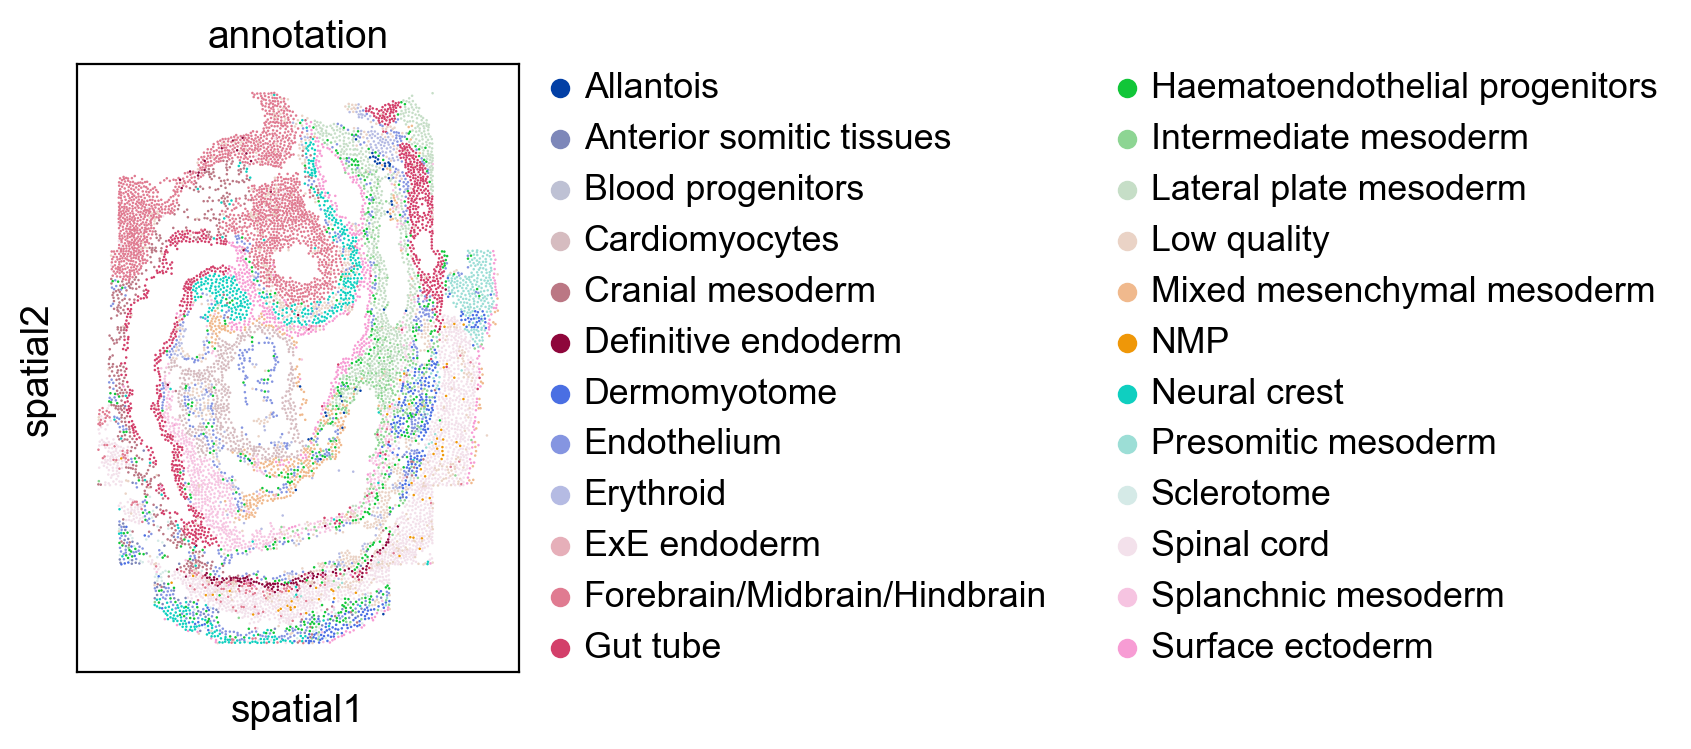

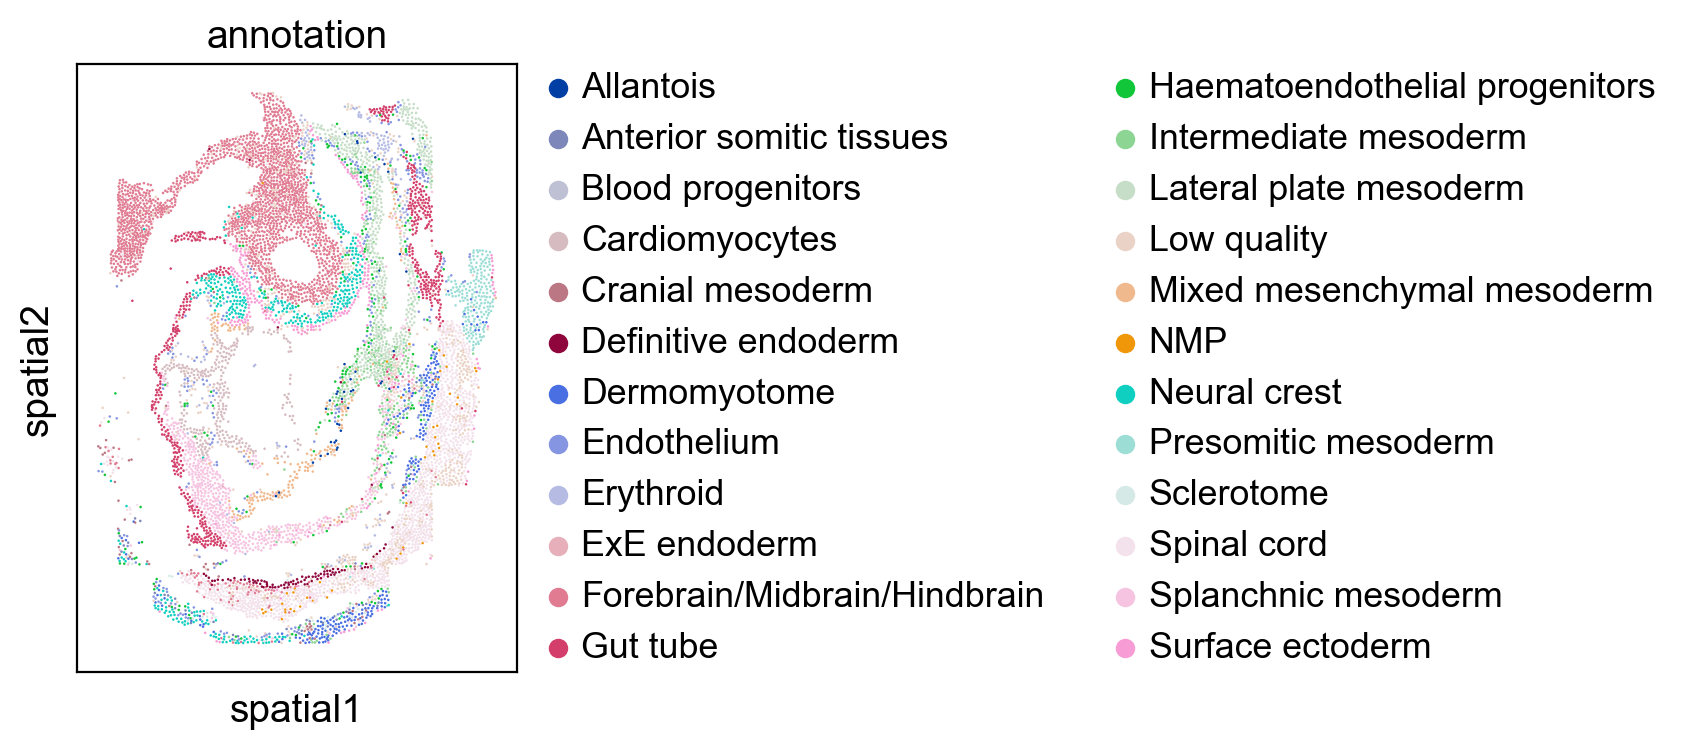

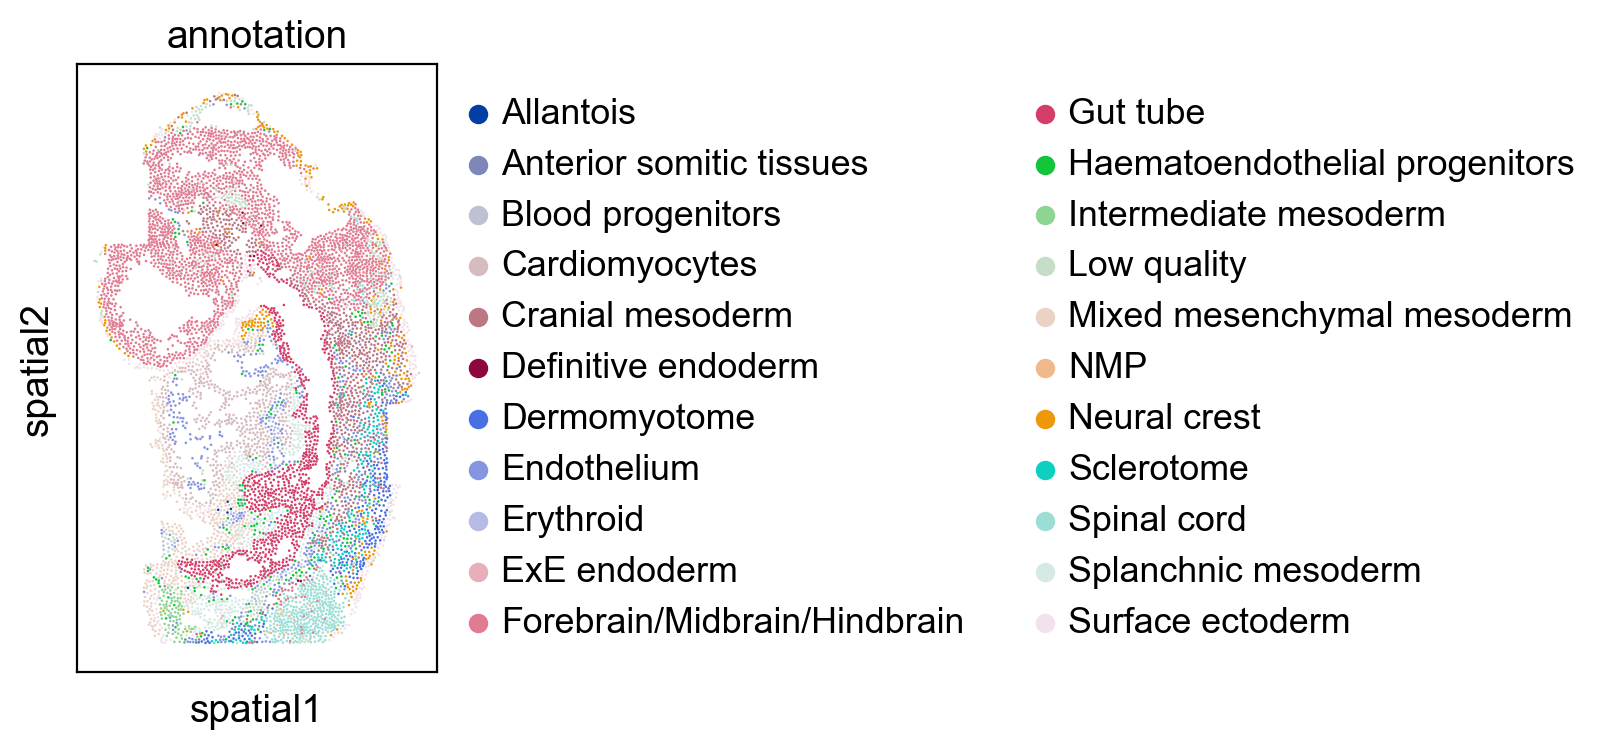

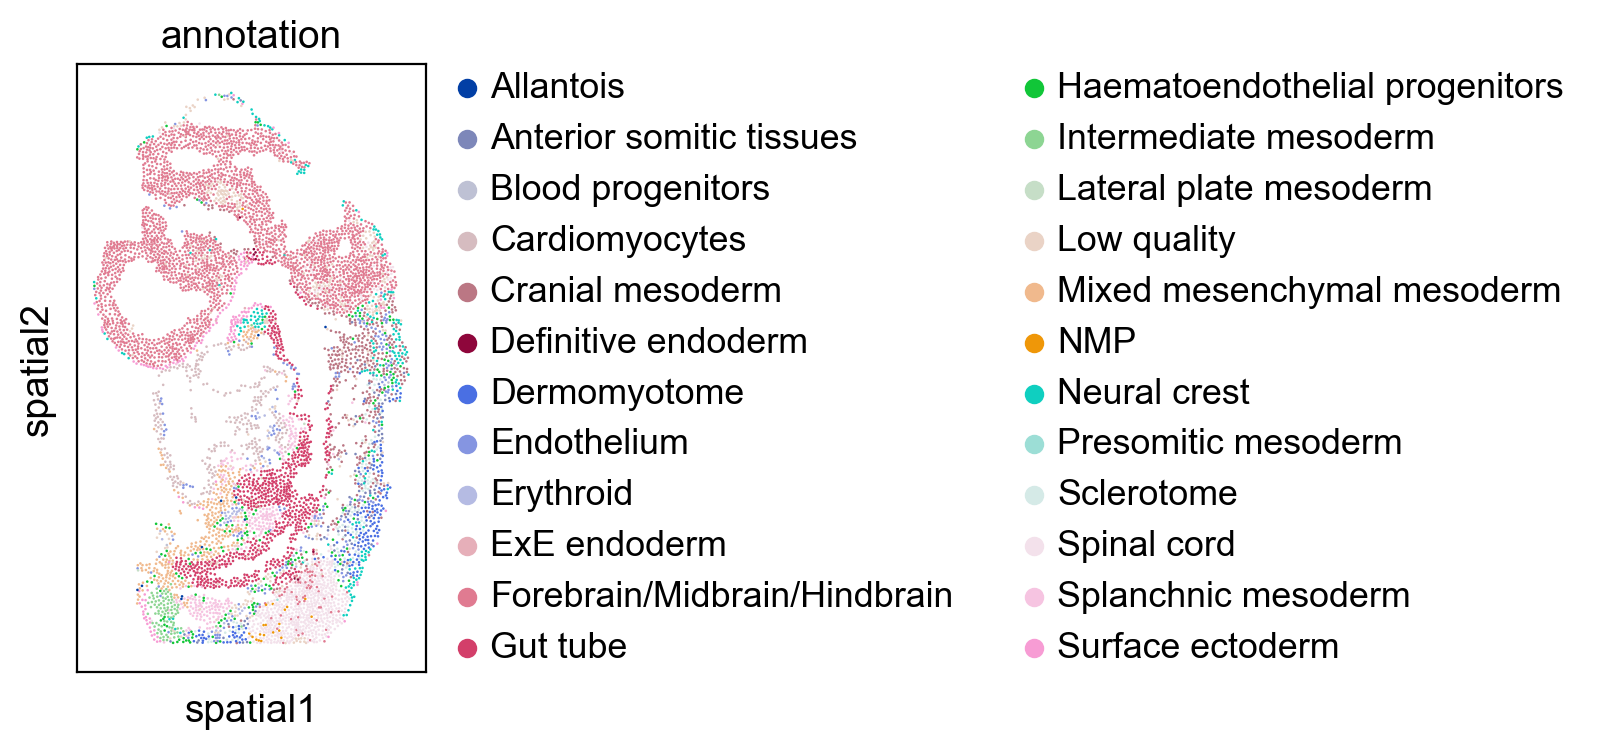

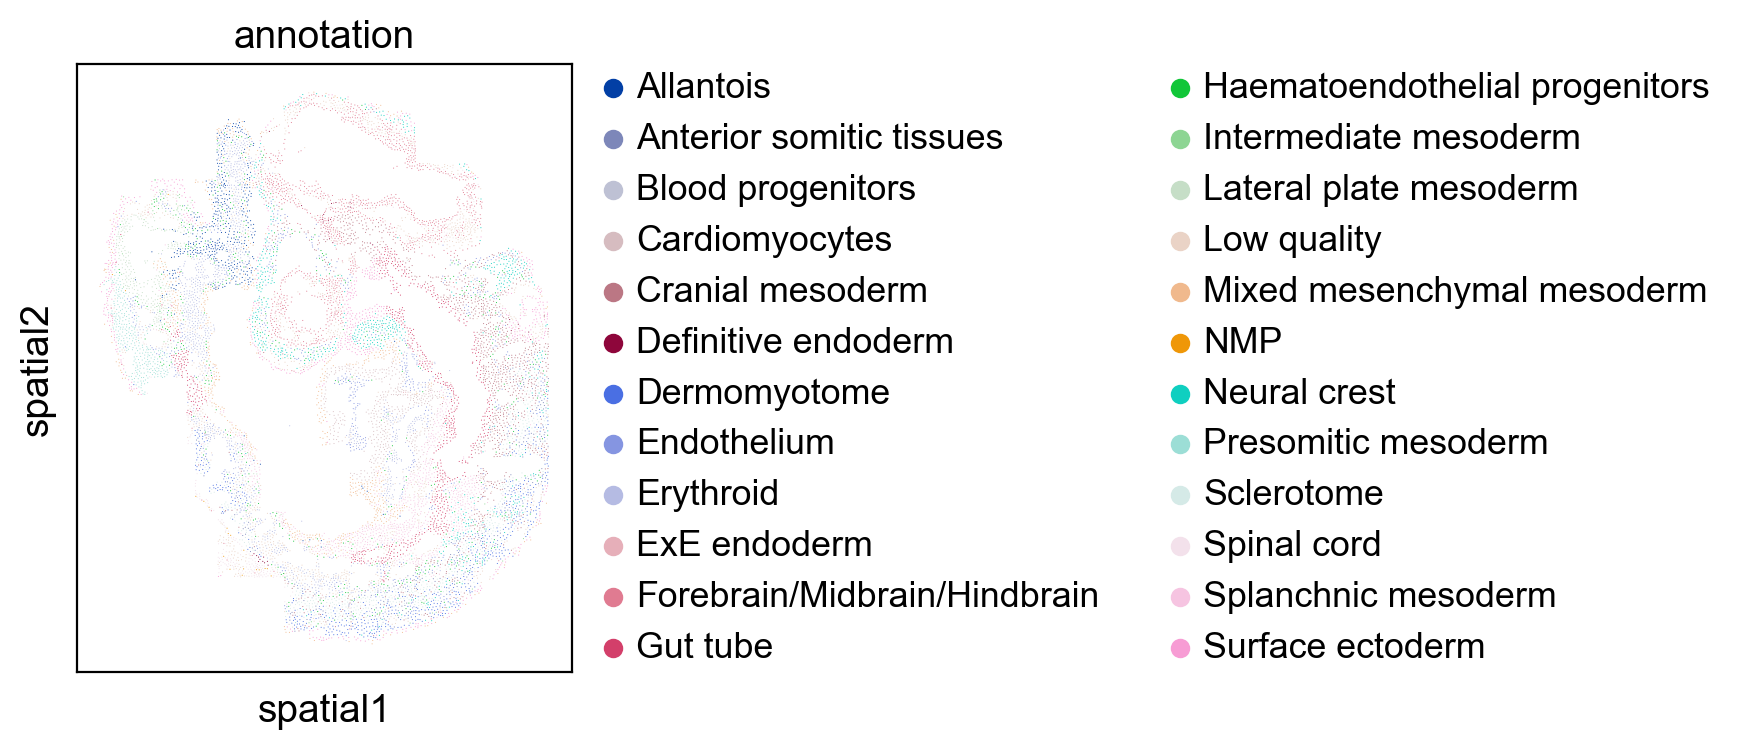

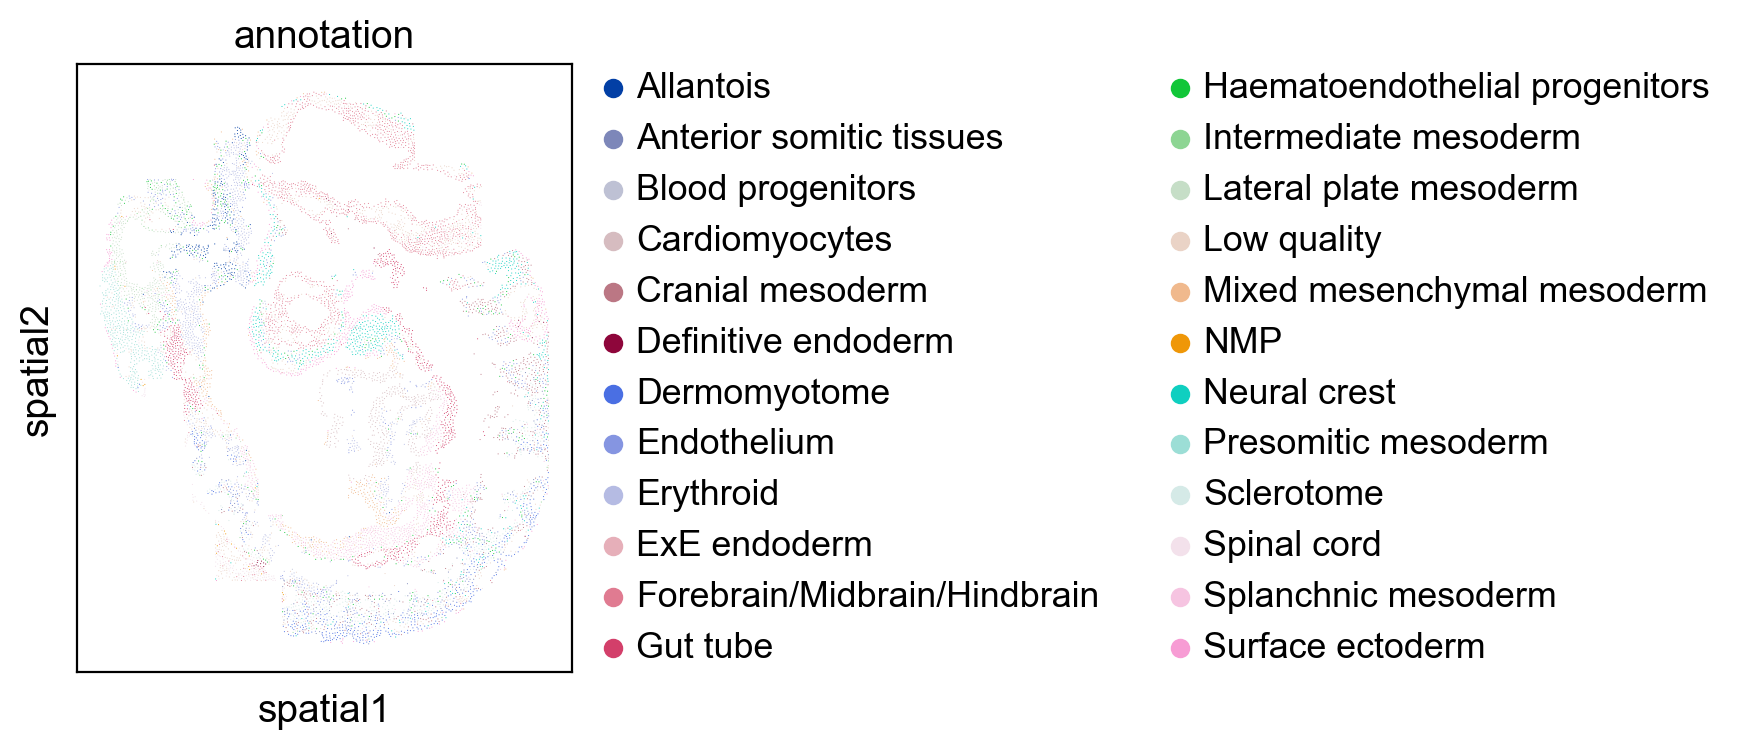

In [6]:
for adata in adata_list:
    sc.pl.spatial(adata, img_key="hires", color='annotation', spot_size = 1)

In [7]:
start = time.time()
matching_list, zip_res = run_SLAT_multi(adata_list, k_cutoff=10, n_jobs = 1)
print(f'Use {time.time()-start:.2f} seconds')

Calculating spatial neighbor graph ...
The graph contains 122384 edges, 11026 cells.
11.099582804280791 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 94255 edges, 8425 cells.
11.18753709198813 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 88401 edges, 8011 cells.
11.034951941081014 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 76336 edges, 6880 cells.
11.095348837209302 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 139535 edges, 12541 cells.
11.126305717247428 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 119537 edges, 10653 cells.
11.220970618605088 neighbors per cell on average.
Parallel mapping dataset:0 --- dataset:1
Use DPCA feature to format graph


D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!
Choose GPU:0 as device
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 6.91
Parallel mapping dataset:1 --- dataset:2
Use DPCA feature to format graph


D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!
Choose GPU:0 as device
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 5.25
Parallel mapping dataset:2 --- dataset:3
Use DPCA feature to format graph


D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!
Choose GPU:0 as device
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 5.04
Parallel mapping dataset:3 --- dataset:4
Use DPCA feature to format graph


D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!
Choose GPU:0 as device
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 6.18
Parallel mapping dataset:4 --- dataset:5
Use DPCA feature to format graph


D:\anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
D:\anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!
Choose GPU:0 as device
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 6.55
Use 57.91 seconds


In [8]:
# print(matching_list)
# print(zip_res)
# print(adata1)
# print(adata2)
# print(adata3)
# print(adata4)

In [9]:
# index_list = [i[1] for i in zip_res] 
# print(index_list)
# print(index_list[2].shape)

In [10]:
# shape_list = []
# for j, mapping in enumerate(matching_list):
#     print(mapping.shape[1])
#     shape_list.append(mapping.shape[1])

# print(shape_list)

Mapping 0th layer 
Mapping 1th layer 
Mapping 2th layer 
Mapping 3th layer 
Mapping 4th layer 


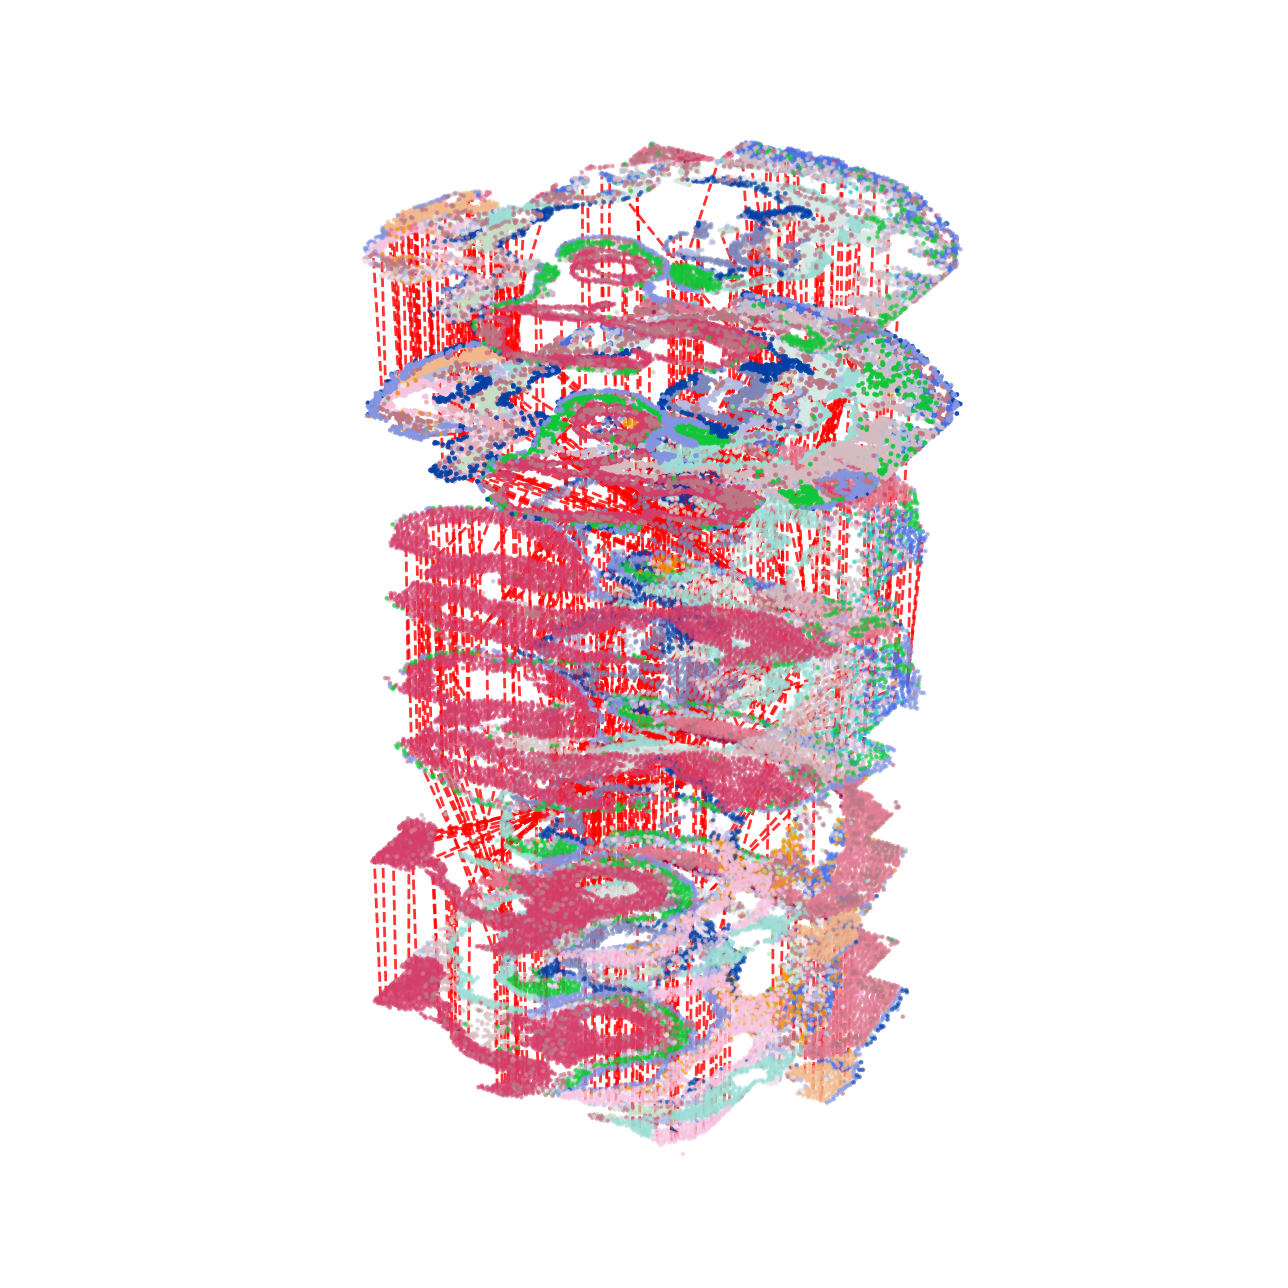

In [11]:
# model = build_3D(adata_list, matching_list, subsample_size = min(shape_list), scale_coordinate = False)
# model.draw_3D(hide_axis=True, line_color='red', height=10, size=[8,20], line_width=1)
model = build_3D(adata_list, matching_list)
model.draw_3D(hide_axis=True, line_color='red', height=10, size=[8,20], line_width=1)

In [19]:
for adata in adata_list:
    adata_df = pd.DataFrame({'index': range(adata.shape[0]),
                        'x': adata.obsm['spatial'][:,0],
                        'y': adata.obsm['spatial'][:,1],
                        'celltype': adata.obs['annotation']})
    adata_df.to_csv(output_dir + 'SLAT_' + experiment_name + '_' + adata.obs['batch'][0] + '.csv')